# Week 11: Sentiment Analysis, Part 2: Plotting Curves with Rolling Averages

This week, our questions and concepts are robust, but the amount of new code to learn is modest :)

Our focus is on plotting "sentiment curves." We will:
* Plot the raw values for sentiment in *The Sign of the Four*
* Calculate rolling averages, plot them, and investigate the portions of the text at which the minimum and maximum points occur

# Getting started

First, let's import our libraries, set our Pandas display options, and reload the data produced during last week's lecture (handily stored in a CSV that lives in the same folder as this notebook).

In [1]:
import pandas as pd
from textblob import TextBlob

In [2]:
pd.set_option('display.max_colwidth', 0)

In [3]:
sot4_sentence_sentiment_df = pd.read_csv("sot4_sentence_sentiment.csv")
sot4_sentence_sentiment_df[:15]

,sentence,polarity,subjectivity
0,Chapter I The Science of Deduction Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case,0.000000,0.000000
1,With his long white nervous fingers he adjusted the delicate needle and rolled back his left shirt-cuff,-0.070000,0.260000
2,For some little time his eyes rested thoughtfully upon the sinewy forearm and wrist all dotted and scarred with innumerable puncture-marks,0.106250,0.500000
3,Finally he thrust the sharp point home pressed down the tiny piston and sank back into the velvet-lined arm-chair with a long sigh of satisfaction,-0.055093,0.489815
4,Three times a day for many months I had witnessed this performance but custom had not reconciled my mind to it,0.500000,0.500000
5,On the contrary from day to day I had become more irritable at the sight and my conscience swelled nightly within me at the thought that I had lacked the courage to protest,0.500000,0.500000
6,Again and again I had registered a vow that I should deliver my soul upon the subject but there was that in the cool nonchalant air of my companion which made him the last man with whom one would care to take anything approaching to a liberty,0.045833,0.262500
7,His great powers his masterly manner and the experience which I had had of his many extraordinary qualities all made me diffident and backward in crossing him,0.358333,0.762500
8,Yet upon that afternoon whether it was the Beaune which I had taken with my lunch or the additional exasperation produced by the extreme deliberation of his manner I suddenly felt that I could hold out no longer,-0.062500,0.750000
9,“ Which is it to-day ” I asked — “ morphine or cocaine ” He raised his eyes languidly from the old black-letter volume which he had opened,0.100000,0.200000


Now let's run the command we ended last lecture with, plotting the "raw" sentiment polarity values for every sentence in *The Sign of the Four*. Can we learn much from this?

<AxesSubplot:>

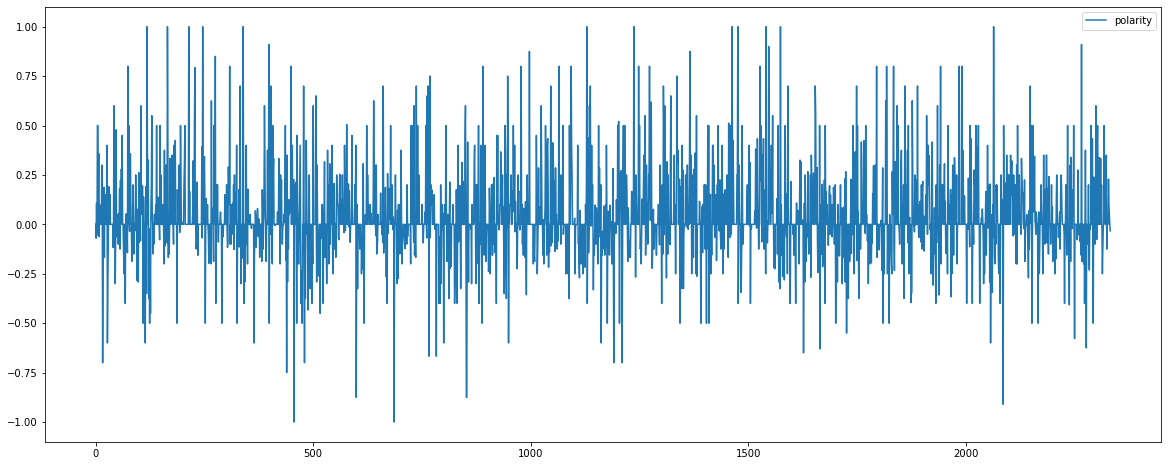

In [4]:
sot4_sentence_sentiment_df[['polarity']].plot(figsize=(20,8))

Just for fun, let's have a look at the raw subjectivity scores, too...

<AxesSubplot:>

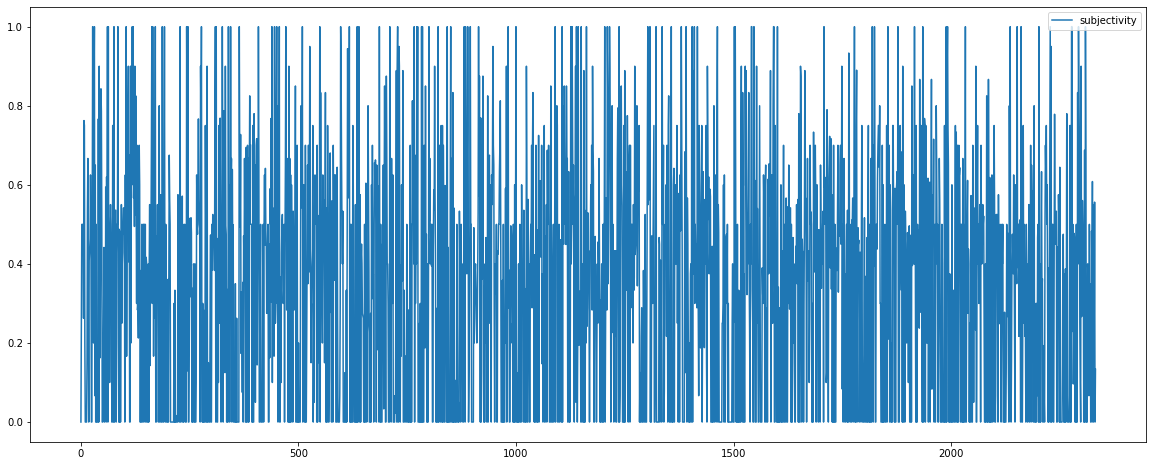

In [5]:
sot4_sentence_sentiment_df[['subjectivity']].plot(figsize=(20,8))

Okay, at this point, I will give a little lecture about Matthew Jockers and Annie Swafford and Fourier Transforms, and then we will pass things over to Mary to explain rolling averages to us...

# Rolling Averages in Pandas

Pandas is basically built to do things like calculate rolling averages. It makes it really easy, which is awesome. All we need to do is specify:
- What part of the DataFrame we're interested in (here, the `polarity` column)
- That we want to do a rolling... something or other (the `.rolling()` method)... and what we want our rolling window size to be (here it's 10, indicated with the `window=10` argument)
- That the "something or other" we want are rolling **averages (or means)** (indicated with the `.mean()` method)

In [6]:
sot4_sentence_sentiment_df['polarity'].rolling(window=10, center=True).mean()

0      NaN      
1      NaN      
2      NaN      
3      NaN      
4      NaN      
        ..      
2328    0.060625
2329   NaN      
2330   NaN      
2331   NaN      
2332   NaN      
Name: polarity, Length: 2333, dtype: float64

It would be a lot handier if that were a column in our DataFrame — so let's put that data there!

In [7]:
sot4_sentence_sentiment_df['rolling_10_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=10, center=True).mean()

In [9]:
sot4_sentence_sentiment_df[:15]

,sentence,polarity,subjectivity,rolling_10_polarity
0,Chapter I The Science of Deduction Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case,0.000000,0.000000,NaN
1,With his long white nervous fingers he adjusted the delicate needle and rolled back his left shirt-cuff,-0.070000,0.260000,NaN
2,For some little time his eyes rested thoughtfully upon the sinewy forearm and wrist all dotted and scarred with innumerable puncture-marks,0.106250,0.500000,NaN
3,Finally he thrust the sharp point home pressed down the tiny piston and sank back into the velvet-lined arm-chair with a long sigh of satisfaction,-0.055093,0.489815,NaN
4,Three times a day for many months I had witnessed this performance but custom had not reconciled my mind to it,0.500000,0.500000,NaN
5,On the contrary from day to day I had become more irritable at the sight and my conscience swelled nightly within me at the thought that I had lacked the courage to protest,0.500000,0.500000,0.142282
6,Again and again I had registered a vow that I should deliver my soul upon the subject but there was that in the cool nonchalant air of my companion which made him the last man with whom one would care to take anything approaching to a liberty,0.045833,0.262500,0.142282
7,His great powers his masterly manner and the experience which I had had of his many extraordinary qualities all made me diffident and backward in crossing him,0.358333,0.762500,0.149282
8,Yet upon that afternoon whether it was the Beaune which I had taken with my lunch or the additional exasperation produced by the extreme deliberation of his manner I suddenly felt that I could hold out no longer,-0.062500,0.750000,0.138657
9,“ Which is it to-day ” I asked — “ morphine or cocaine ” He raised his eyes languidly from the old black-letter volume which he had opened,0.100000,0.200000,0.144167


Now all we need to do is to plot our new column! 

Does that look any better?

<AxesSubplot:>

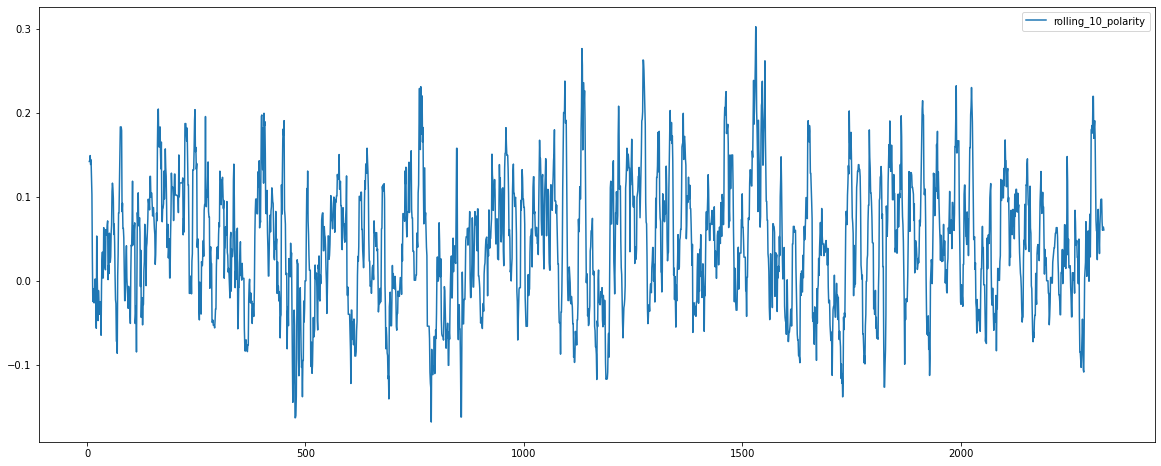

In [10]:
sot4_sentence_sentiment_df[['rolling_10_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

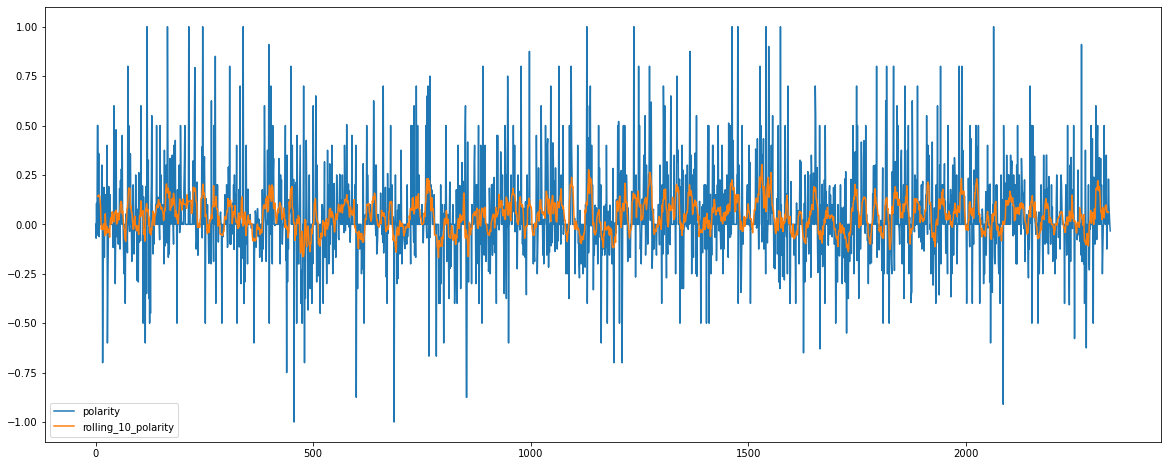

In [11]:
sot4_sentence_sentiment_df[['polarity','rolling_10_polarity']].plot(figsize=(20,8))

Let's try some other window sizes: 25, 50, and 100. (You can try others, too!)

In [12]:
sot4_sentence_sentiment_df['rolling_25_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=25, center=True).mean()

<AxesSubplot:>

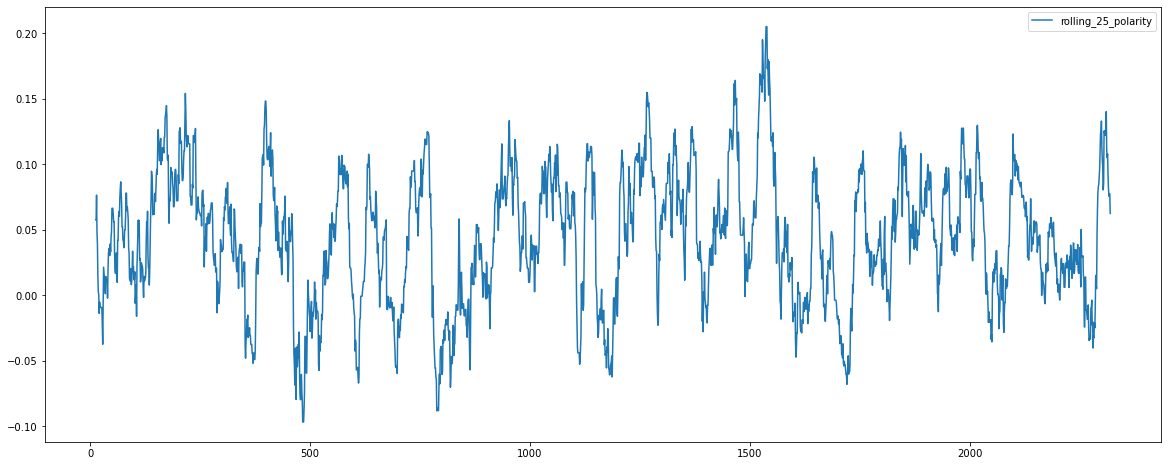

In [13]:
sot4_sentence_sentiment_df[['rolling_25_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

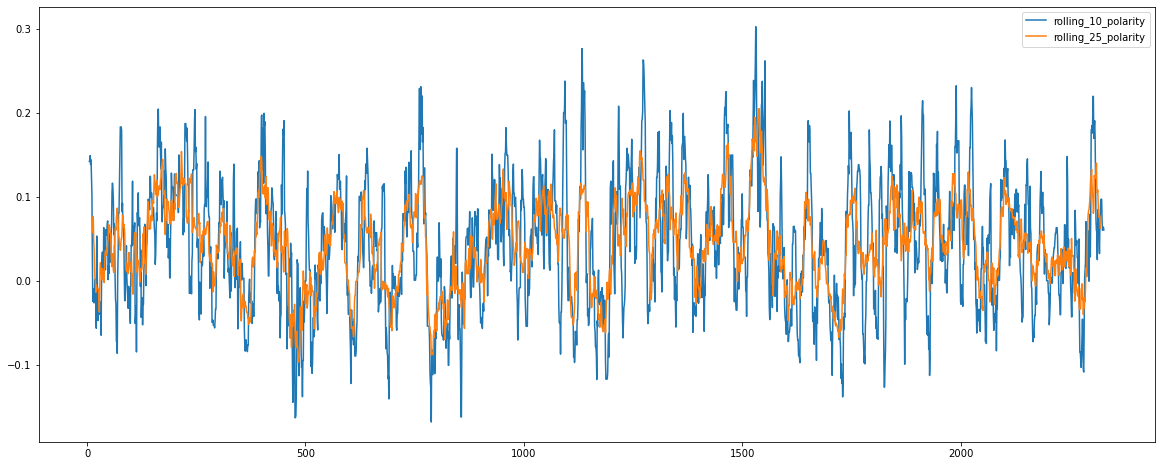

In [14]:
sot4_sentence_sentiment_df[['rolling_10_polarity','rolling_25_polarity']].plot(figsize=(20,8))

In [15]:
sot4_sentence_sentiment_df['rolling_50_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=50, center=True).mean()

<AxesSubplot:>

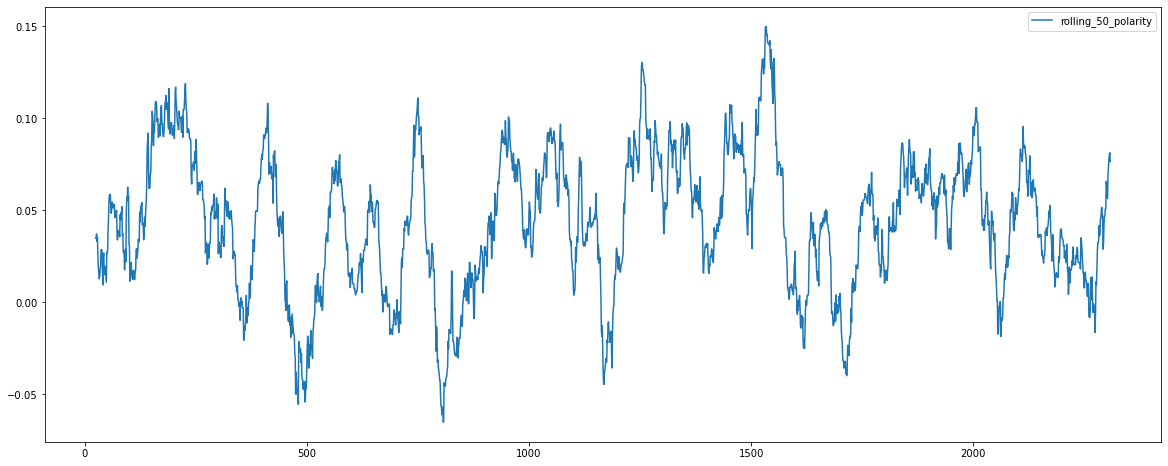

In [16]:
sot4_sentence_sentiment_df[['rolling_50_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

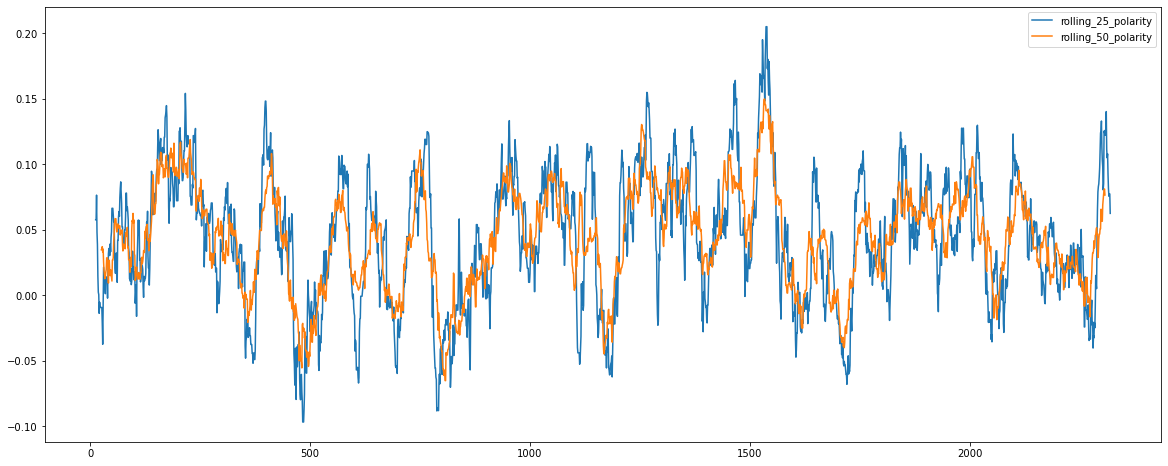

In [17]:
sot4_sentence_sentiment_df[['rolling_25_polarity','rolling_50_polarity']].plot(figsize=(20,8))

In [18]:
sot4_sentence_sentiment_df['rolling_100_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=100, center=True).mean()

<AxesSubplot:>

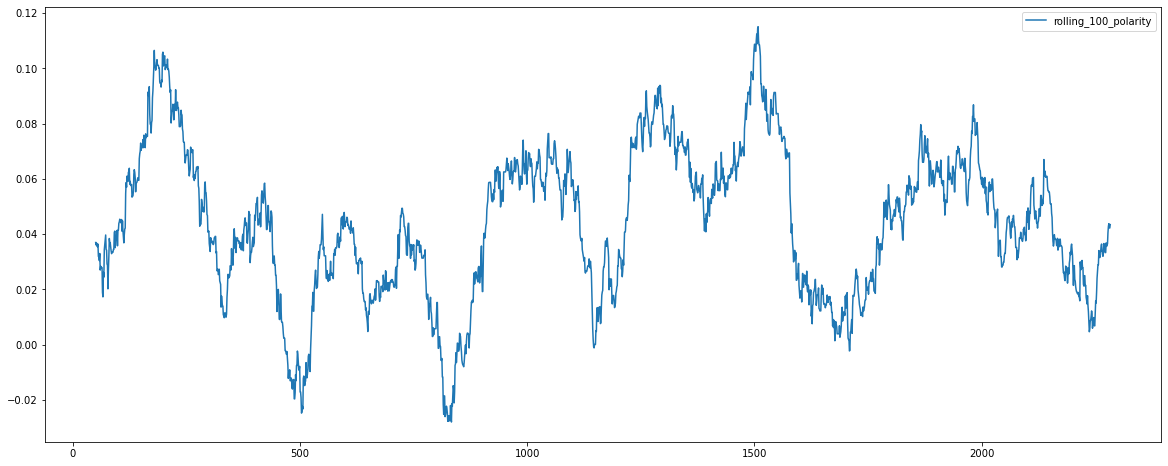

In [19]:
sot4_sentence_sentiment_df[['rolling_100_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

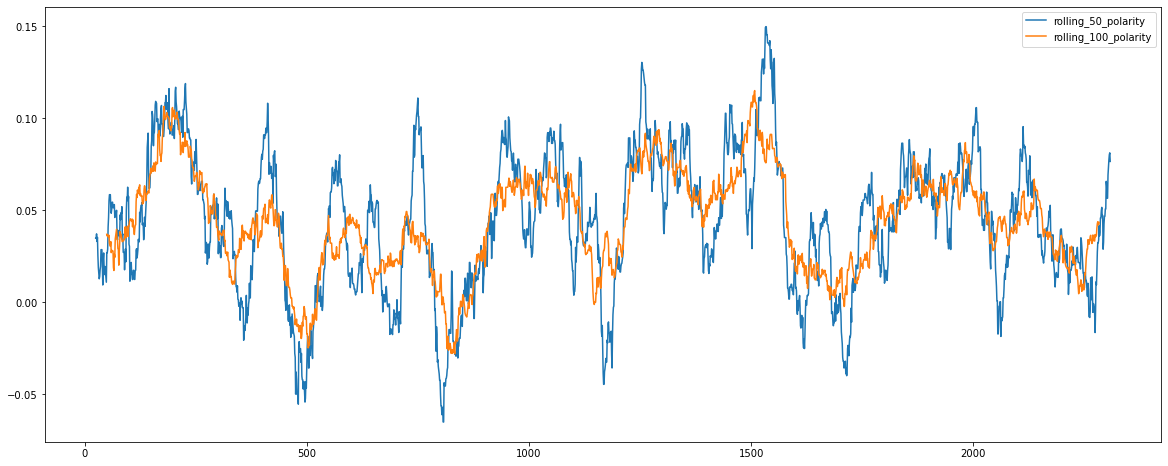

In [20]:
sot4_sentence_sentiment_df[['rolling_50_polarity','rolling_100_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

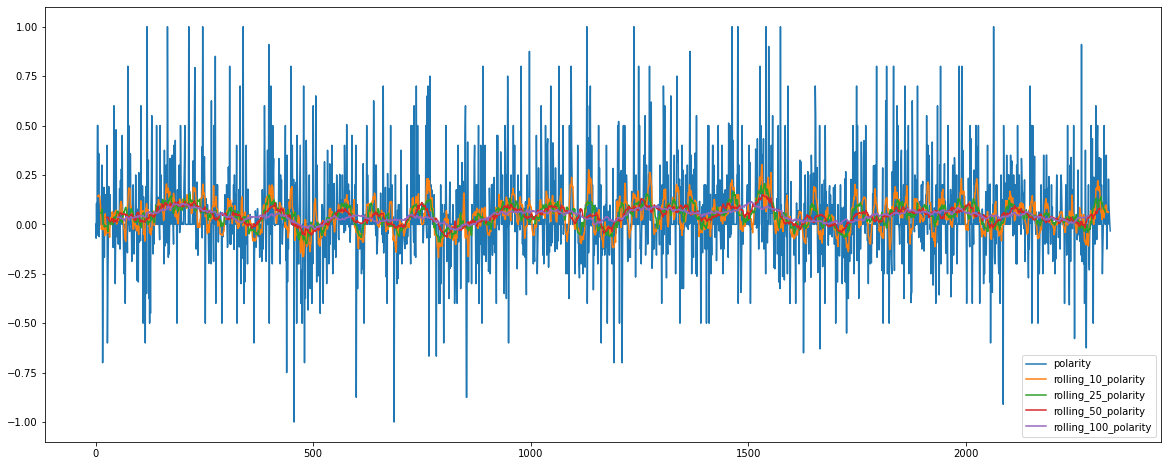

In [21]:
sot4_sentence_sentiment_df[['polarity','rolling_10_polarity','rolling_25_polarity','rolling_50_polarity','rolling_100_polarity']].plot(figsize=(20,8))

# Finding the Maximum and Minimum Points

The below line of Pandas code is an absolute whopper... but I think we're all ready for it at this point!

In [22]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_50_polarity']==sot4_sentence_sentiment_df['rolling_50_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
807,“ My dear Watson try a little analysis yourself ” said he with a touch of impatience,-0.1875,0.5,0.047222,-0.022454,-0.065088,0.002841
808,“ You know my methods,0.0000,0.0,0.009722,-0.022454,-0.065088,-0.000701


In [23]:
sot4_sentence_sentiment_df['rolling_50_polarity'].min()

-0.06508789682539683

In [24]:
min_polarity_50 = sot4_sentence_sentiment_df['rolling_50_polarity'].min()

In [25]:
sot4_sentence_sentiment_df['rolling_50_polarity'] == min_polarity_50

0       False
1       False
2       False
3       False
4       False
        ...  
2328    False
2329    False
2330    False
2331    False
2332    False
Name: rolling_50_polarity, Length: 2333, dtype: bool

In [26]:
has_min_polarity_50 = sot4_sentence_sentiment_df['rolling_50_polarity'] == min_polarity_50

In [27]:
sot4_sentence_sentiment_df[has_min_polarity_50]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
807,“ My dear Watson try a little analysis yourself ” said he with a touch of impatience,-0.1875,0.5,0.047222,-0.022454,-0.065088,0.002841
808,“ You know my methods,0.0000,0.0,0.009722,-0.022454,-0.065088,-0.000701


In [28]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_10_polarity']==sot4_sentence_sentiment_df['rolling_10_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
788,He must have done so,0.0,0.0,-0.168472,-0.088194,-0.004455,0.012069


In [29]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_25_polarity']==sot4_sentence_sentiment_df['rolling_25_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
483,I alone knew it,0.000,0.0,0.020000,-0.096667,-0.021381,-0.016085
484,When in India he and I through a remarkable chain of circumstances came into possession of a considerable treasure,0.425,0.6,-0.093333,-0.096667,-0.027214,-0.012835
485,I brought it over to England and on the night of Morstan ’ s arrival he came straight over here to claim his share,0.200,0.4,-0.113333,-0.096667,-0.025214,-0.012960


In [30]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_50_polarity']==sot4_sentence_sentiment_df['rolling_50_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
807,“ My dear Watson try a little analysis yourself ” said he with a touch of impatience,-0.1875,0.5,0.047222,-0.022454,-0.065088,0.002841
808,“ You know my methods,0.0000,0.0,0.009722,-0.022454,-0.065088,-0.000701


In [31]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_100_polarity']==sot4_sentence_sentiment_df['rolling_100_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
833,Now examine the thorn ” I took it up gingerly and held it in the light of the lantern,0.4,0.7,0.019143,-0.00726,-0.028322,-0.028018


Let's have a look now at the *maximum* points...

In [32]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_10_polarity']==sot4_sentence_sentiment_df['rolling_10_polarity'].max()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1531,I think that it would be a pleasure to my friend here to take the box round to the young lady to whom half of it rightfully belongs,-0.088889,0.322222,0.302956,0.168499,0.138285,0.07644


In [33]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_25_polarity']==sot4_sentence_sentiment_df['rolling_25_polarity'].max()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1537,I should much like to have a few details about this matter from the lips of Jonathan Small himself,-0.083333,0.233333,0.191429,0.20502,0.14091,0.083701
1538,You know I like to work the detail of my cases out,0.000000,0.000000,0.156429,0.20502,0.14091,0.083535
1539,There is no objection to my having an unofficial interview with him either here in my rooms or elsewhere as long as he is efficiently guarded ” “ Well you are master of the situation,0.175000,0.500000,0.138095,0.20502,0.14091,0.083910


In [34]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_50_polarity']==sot4_sentence_sentiment_df['rolling_50_polarity'].max()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1533,“ However the whole thing is irregular and I suppose we must wink at it,0.200000,0.400000,0.202123,0.165499,0.149785,0.075778
1534,The treasure must afterwards be handed over to the authorities until after the official investigation ” “ Certainly,0.214286,0.571429,0.180040,0.148166,0.149785,0.076410


In [35]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_100_polarity']==sot4_sentence_sentiment_df['rolling_100_polarity'].max()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1508,Jones and I resumed our cigars and our talk,0.0,0.0,-0.011875,0.053617,0.0728,0.115052


# Investigating the Extremes 

Let's have a look at the 50-sentence window that the `rolling_50_polarity` score indicates are the most negative and most positive, and see if seems like it's on to something...

(Yeah, that's right, I'm just taking the min and max points, then manually adding and subtracting 25 to make a 50-sentence window! The minimum window is centred at 831 and the maximum at 1557.)

In [36]:
sot4_sentence_sentiment_df[782:832]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
782,“ You will not apply my precept ” he said shaking his head,0.000000,0.000000,-0.054167,-0.039926,0.031920,0.015123
783,“ How often have I said to you that when you have eliminated the impossible whatever remains however improbable must be the truth,-0.666667,1.000000,-0.054167,-0.047426,0.026920,0.009123
784,We know that he did not come through the door the window or the chimney,0.000000,0.000000,-0.069167,-0.055426,0.026920,0.014678
785,We also know that he could not have been concealed in the room as there is no concealment possible,0.000000,1.000000,-0.109167,-0.055426,0.016920,0.013795
786,Whence then did he come ” “ He came through the hole in the roof ” I cried,0.000000,0.000000,-0.122222,-0.062389,0.017920,0.015438
787,“ Of course he did,0.000000,0.000000,-0.128472,-0.064194,0.016045,0.017105
788,He must have done so,0.000000,0.000000,-0.168472,-0.088194,-0.004455,0.012069
789,If you will have the kindness to hold the lamp for me we shall now extend our researches to the room above —the secret room in which the treasure was found ” He mounted the steps and seizing a rafter with either hand he swung himself up into the garret,-0.400000,0.700000,-0.081806,-0.085928,-0.003455,0.011194
790,Then lying on his face he reached down for the lamp and held it while I followed him,-0.155556,0.288889,-0.111806,-0.085928,-0.013169,0.007944
791,The chamber in which we found ourselves was about ten feet one way and six the other,-0.062500,0.187500,-0.111806,-0.087928,-0.026606,0.002944


In [37]:
sot4_sentence_sentiment_df.loc[1508:1558]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1508,Jones and I resumed our cigars and our talk,0.000000,0.000000,-0.011875,0.053617,0.072800,0.115052
1509,Suddenly however Holmes ’ s voice broke in upon us,0.000000,0.500000,-0.011250,0.070950,0.083689,0.110052
1510,“ I think that you might offer me a cigar too ” he said,0.000000,0.000000,-0.042500,0.072150,0.093975,0.108490
1511,We both started in our chairs,0.000000,0.000000,0.004167,0.064150,0.104766,0.108490
1512,There was Holmes sitting close to us with an air of quiet amusement,0.000000,0.333333,0.004167,0.059150,0.092266,0.106715
1513,“ Holmes ” I exclaimed,0.000000,0.000000,0.044792,0.059150,0.090600,0.104402
1514,“ You here,0.000000,0.000000,0.074792,0.059150,0.092600,0.094402
1515,But where is the old man ” “ Here is the old man ” said he holding out a heap of white hair,0.066667,0.133333,0.072917,0.075150,0.096100,0.094402
1516,“ Here he is —wig whiskers eyebrows and all,0.000000,0.000000,0.072917,0.084233,0.091100,0.090152
1517,I thought my disguise was pretty good but I hardly expected that it would stand that test ” “ Ah You rogue ” cried Jones highly delighted,0.381250,0.675000,0.116250,0.091733,0.111100,0.089361


# Using TextBlob's Other Sentiment System

We probably won't have time for this, but just in case — let's try using TextBlob's other built-in sentiment system — the Naive Bayes classifier trained on movie reviews — and see what basic shape it gives. 

You'll recall that this is the basic syntax for calling it...

In [38]:
from textblob.sentiments import NaiveBayesAnalyzer

TextBlob("Neil Young is the greatest artist to come out of this country", analyzer=NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.912927894246015, p_neg=0.0870721057539853)

If we then subset that to to `[1]`, the `p_pos` value, we'll get its sense of how positive that sentence is (which is equal to 1-`p_neg`).

In [ ]:
TextBlob("Neil Young is the greatest artist to come out of this country", analyzer=NaiveBayesAnalyzer()).sentiment[1]

Okay, let's build up a DataFrame from parallel lists, like we did last week.

In [39]:
sot4 = open("sign-of-four.txt", encoding="utf-8").read()
sot4_blob = TextBlob(sot4, analyzer=NaiveBayesAnalyzer())
sot4_sentences_blob = sot4_blob.sentences

sot4_ppos = []
for sentence in sot4_sentences_blob:
    sot4_ppos.append(sentence.sentiment[1])
    
sot4_sentences = []
for sentence in sot4_sentences_blob:
    sot4_sentences.append(" ".join(sentence.words))

sot4_sentence_bayes_df = pd.DataFrame({
    'sentence': sot4_sentences,
    'ppos': sot4_ppos,
})

sot4_sentence_bayes_df['rolling_25_ppos'] = sot4_sentence_bayes_df['ppos'].rolling(window=25, center=True).mean()

sot4_sentence_bayes_df['rolling_100_ppos'] = sot4_sentence_bayes_df['ppos'].rolling(window=100, center=True).mean()

In [40]:
sot4_sentence_bayes_df[:10]

,sentence,ppos,rolling_25_ppos,rolling_100_ppos
0,Chapter I The Science of Deduction Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case,0.919969,NaN,NaN
1,With his long white nervous fingers he adjusted the delicate needle and rolled back his left shirt-cuff,0.964087,NaN,NaN
2,For some little time his eyes rested thoughtfully upon the sinewy forearm and wrist all dotted and scarred with innumerable puncture-marks,0.833553,NaN,NaN
3,Finally he thrust the sharp point home pressed down the tiny piston and sank back into the velvet-lined arm-chair with a long sigh of satisfaction,0.933416,NaN,NaN
4,Three times a day for many months I had witnessed this performance but custom had not reconciled my mind to it,0.948646,NaN,NaN
5,On the contrary from day to day I had become more irritable at the sight and my conscience swelled nightly within me at the thought that I had lacked the courage to protest,0.039030,NaN,NaN
6,Again and again I had registered a vow that I should deliver my soul upon the subject but there was that in the cool nonchalant air of my companion which made him the last man with whom one would care to take anything approaching to a liberty,0.602286,NaN,NaN
7,His great powers his masterly manner and the experience which I had had of his many extraordinary qualities all made me diffident and backward in crossing him,0.980640,NaN,NaN
8,Yet upon that afternoon whether it was the Beaune which I had taken with my lunch or the additional exasperation produced by the extreme deliberation of his manner I suddenly felt that I could hold out no longer,0.992123,NaN,NaN
9,“ Which is it to-day ” I asked — “ morphine or cocaine ” He raised his eyes languidly from the old black-letter volume which he had opened,0.730221,NaN,NaN


In [ ]:
sot4_sentence_bayes_df[['rolling_25_ppos','rolling_100_ppos']].plot(figsize=(20,8))

In [ ]:
sot4_sentence_bayes_df[sot4_sentence_bayes_df['rolling_25_ppos']==sot4_sentence_bayes_df['rolling_25_ppos'].min()]

In [ ]:
sot4_sentence_bayes_df[sot4_sentence_bayes_df['rolling_100_ppos']==sot4_sentence_bayes_df['rolling_100_ppos'].min()]

In [ ]:
sot4_sentence_bayes_df[sot4_sentence_bayes_df['rolling_25_ppos']==sot4_sentence_bayes_df['rolling_25_ppos'].max()]

In [ ]:
sot4_sentence_bayes_df[sot4_sentence_bayes_df['rolling_100_ppos']==sot4_sentence_bayes_df['rolling_100_ppos'].max()]